In [1]:
import pandas as pd

#google cloud big query libaries
from google.cloud import bigquery
from google.oauth2 import service_account

In [2]:
# Link to BigQuery Client through API

key_path = r"C:\Users\bhereth\confidential-2023-utah-hts-db5335615978.json"
#key_path = r"C:\Users\bhereth\tdm-scenarios-a85044dbbfd3.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
print ('Successfully Linked to BigQuery Client!')

Successfully Linked to BigQuery Client!


In [3]:
# CRAFT SQL STATEMENT  (with help of ChatGPT)

strQry1 = """
SELECT
  a.age,
  b.age_description,
  a.bike_more_category,
  a.total
FROM
  (
    SELECT
      person.age,
      'bike_more_1' AS bike_more_category,
      SUM(hh.bike_more_1) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_1 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_2' AS bike_more_category,
      SUM(hh.bike_more_2) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_2 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_3' AS bike_more_category,
      SUM(hh.bike_more_3) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_3 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_4' AS bike_more_category,
      SUM(hh.bike_more_4) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_4 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_5' AS bike_more_category,
      SUM(hh.bike_more_5) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_5 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_6' AS bike_more_category,
      SUM(hh.bike_more_6) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_6 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_7' AS bike_more_category,
      SUM(hh.bike_more_7) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_7 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_8' AS bike_more_category,
      SUM(hh.bike_more_8) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_8 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_996' AS bike_more_category,
      SUM(hh.bike_more_996) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_996 <> 995
    GROUP BY
      person.age

    UNION ALL

    SELECT
      person.age,
      'bike_more_997' AS bike_more_category,
      SUM(hh.bike_more_997) AS total
    FROM
      `confidential-2023-utah-hts.20230313.hh` AS hh
    JOIN
      `confidential-2023-utah-hts.20230313.person` AS person
    ON
      hh.hh_id = person.hh_id
    WHERE
      hh.bike_more_997 <> 995
    GROUP BY
      person.age

  ) a
JOIN
  (
    SELECT
      CAST(string_field_2 AS INT64) AS age,
      string_field_3 AS age_description
    FROM
      `confidential-2023-utah-hts.20230313.value_labels`
    WHERE
      string_field_0 = 'person' AND
      string_field_1 = 'age'
  ) b
ON
  a.age = b.age
ORDER BY
  a.age, a.bike_more_category;

"""

In [4]:
# DOESN'T WORK YET WITH TRIP TABLE
# AWAITING GLOBBING

# ACCESS DATA THROUGH BIGQUERY API
df_bike_more_hh_by_age = client.query(strQry1).to_dataframe()

display(df_bike_more_hh_by_age)

,age,age_description,bike_more_category,total
0,1,Under 5,bike_more_1,1327
1,1,Under 5,bike_more_2,1191
2,1,Under 5,bike_more_3,349
3,1,Under 5,bike_more_4,494
4,1,Under 5,bike_more_5,434
...,...,...,...,...
105,11,85 or older,bike_more_6,13
106,11,85 or older,bike_more_7,0
107,11,85 or older,bike_more_8,3
108,11,85 or older,bike_more_996,117


In [21]:
df_bike_more_descriptions = client.query(
"""
SELECT *
FROM `confidential-2023-utah-hts.20230313.variable_description`
WHERE table = 'hh' 
  AND REGEXP_CONTAINS(variable, r'bike_');
"""
).to_dataframe().rename(columns={'variable':'bike_more_category','description':'bike_more_description'}).drop(columns=['table','data_type','logic','category'])
df_bike_more_descriptions

,bike_more_category,bike_more_description
0,bike_more_other,Other factors to encourage HH to bike more tex...
1,bike_more_1,Factors to encourage HH to bike more: Safer ri...
2,bike_more_2,Factors to encourage HH to bike more: Shorter ...
3,bike_more_3,Factors to encourage HH to bike more: Better k...
4,bike_more_4,Factors to encourage HH to bike more: Amenitie...
5,bike_more_5,Factors to encourage HH to bike more: More att...
6,bike_more_6,Factors to encourage HH to bike more: Lower co...
7,bike_more_7,Factors to encourage HH to bike more: Expanded...
8,bike_more_8,Factors to encourage HH to bike more: Electric...
9,bike_more_996,Factors to encourage HH to bike more: None of ...


In [45]:
df_short = pd.DataFrame([
    ["Factors to encourage HH to bike more: Safer riding conditions for bicyclists (e.g., bike paths separated from motor vehicles)","Safer Conditions"],
    ["Factors to encourage HH to bike more: Shorter distance between home and work","Shorter Distance"],
    ["Factors to encourage HH to bike more: Better knowledge of the best bike route to work","Better Knowledge"],
    ["Factors to encourage HH to bike more: Amenities like showers and secure storage at work","Amenities at Work"],
    ["Factors to encourage HH to bike more: More attractive or scenic routes","More Attractive"],
    ["Factors to encourage HH to bike more: Lower cost electric bikes or similar equipment (e.g., electric scooters)","Lower Cost Equipment"],
    ["Factors to encourage HH to bike more: Expanded bike share system","Expanded Bike Share"],
    ["Factors to encourage HH to bike more: Electric bike share system","Electric Bike Share"],
    ["Factors to encourage HH to bike more: None of the above","None"],
    ["Factors to encourage HH to bike more: Other","Other"]
], columns=('bike_more_description','bike_more_description_short'))

In [47]:
df_bike_more_descriptions_with_short = pd.merge(df_bike_more_descriptions, df_short, on='bike_more_description')
df_bike_more_descriptions_with_short

,bike_more_category,bike_more_description,bike_more_description_short
0,bike_more_1,Factors to encourage HH to bike more: Safer ri...,Safer Conditions
1,bike_more_2,Factors to encourage HH to bike more: Shorter ...,Shorter Distance
2,bike_more_3,Factors to encourage HH to bike more: Better k...,Better Knowledge
3,bike_more_4,Factors to encourage HH to bike more: Amenitie...,Amenities at Work
4,bike_more_5,Factors to encourage HH to bike more: More att...,More Attractive
5,bike_more_6,Factors to encourage HH to bike more: Lower co...,Lower Cost Equipment
6,bike_more_7,Factors to encourage HH to bike more: Expanded...,Expanded Bike Share
7,bike_more_8,Factors to encourage HH to bike more: Electric...,Electric Bike Share
8,bike_more_996,Factors to encourage HH to bike more: None of ...,None
9,bike_more_997,Factors to encourage HH to bike more: Other,Other


In [48]:
df_bike_more_hh_by_age_with_descriptions = pd.merge(df_bike_more_hh_by_age, df_bike_more_descriptions_with_short, on='bike_more_category')

# Ensure the age_label is a string and pad it with zeros to ensure it is at least 2 characters long
df_bike_more_hh_by_age_with_descriptions['age_label'] = df_bike_more_hh_by_age_with_descriptions['age'].astype(str).str.zfill(2) + '_'

# Concatenate the padded age_label with age_description
df_bike_more_hh_by_age_with_descriptions['age_label'] = df_bike_more_hh_by_age_with_descriptions['age_label'] + df_bike_more_hh_by_age_with_descriptions['age_description']

df_bike_more_hh_by_age_with_descriptions

,age,age_description,bike_more_category,total,bike_more_description,bike_more_description_short,age_label
0,1,Under 5,bike_more_1,1327,Factors to encourage HH to bike more: Safer ri...,Safer Conditions,01_Under 5
1,2,5-15,bike_more_1,2628,Factors to encourage HH to bike more: Safer ri...,Safer Conditions,02_5-15
2,3,16-17,bike_more_1,422,Factors to encourage HH to bike more: Safer ri...,Safer Conditions,03_16-17
3,4,18-24,bike_more_1,2789,Factors to encourage HH to bike more: Safer ri...,Safer Conditions,04_18-24
4,5,25-34,bike_more_1,3244,Factors to encourage HH to bike more: Safer ri...,Safer Conditions,05_25-34
...,...,...,...,...,...,...,...
105,7,45-54,bike_more_997,307,Factors to encourage HH to bike more: Other,Other,07_45-54
106,8,55-64,bike_more_997,212,Factors to encourage HH to bike more: Other,Other,08_55-64
107,9,65-74,bike_more_997,224,Factors to encourage HH to bike more: Other,Other,09_65-74
108,10,75-84,bike_more_997,71,Factors to encourage HH to bike more: Other,Other,10_75-84


In [49]:
df_bike_more_hh_by_age_with_descriptions.pivot(index=('bike_more_category','bike_more_description_short'), columns='age_label',values='total')

,age_label,01_Under 5,02_5-15,03_16-17,04_18-24,05_25-34,06_35-44,07_45-54,08_55-64,09_65-74,10_75-84,11_85 or older
bike_more_category,bike_more_description_short,,,,,,,,,,,
bike_more_1,Safer Conditions,1327,2628,422,2789,3244,2299,1495,1107,1081,257,37
bike_more_2,Shorter Distance,1191,2258,388,2293,2699,1874,1205,719,304,76,20
bike_more_3,Better Knowledge,349,496,101,1092,1053,534,359,184,115,23,3
bike_more_4,Amenities at Work,494,872,164,1274,1427,850,512,305,120,22,6
bike_more_5,More Attractive,434,727,111,844,1130,674,416,268,223,46,9
bike_more_6,Lower Cost Equipment,718,1324,232,1491,1729,1172,754,578,462,107,13
bike_more_7,Expanded Bike Share,145,198,35,409,506,272,149,68,57,17,0
bike_more_8,Electric Bike Share,167,300,66,499,568,380,232,152,105,31,3
bike_more_996,None,556,1069,172,985,1049,907,787,978,1357,662,117


In [59]:
# Perform the pivot operation
pivot_table = df_bike_more_hh_by_age_with_descriptions.pivot(index=('bike_more_category', 'bike_more_description_short'), columns='age_label', values='total')

# Calculate the sum of totals across columns for each row
row_totals = pivot_table.sum(axis=1)

# Calculate the percentage distribution
percentage_distribution = pivot_table.div(row_totals, axis=0) * 100

# Optional: if you want a cleaner table, you can fill NaN values with zero
percentage_distribution = percentage_distribution.fillna(0)

display(percentage_distribution)

percentage_distribution.reset_index(inplace=True)

display(percentage_distribution)

# Prepare data for stacked bar chart: convert wide format to long format
percentage_distribution_long = percentage_distribution.melt(id_vars=['bike_more_category', 'bike_more_description_short'], var_name='age_label', value_name='percentage')

display(percentage_distribution_long)


,age_label,01_Under 5,02_5-15,03_16-17,04_18-24,05_25-34,06_35-44,07_45-54,08_55-64,09_65-74,10_75-84,11_85 or older
bike_more_category,bike_more_description_short,,,,,,,,,,,
bike_more_1,Safer Conditions,7.952775,15.74973,2.529066,16.714611,19.441448,13.778017,8.959607,6.634304,6.478485,1.540213,0.221743
bike_more_2,Shorter Distance,9.14255,17.333231,2.978429,17.601904,20.718508,14.385507,9.250019,5.519306,2.333615,0.583404,0.153527
bike_more_3,Better Knowledge,8.099327,11.510791,2.343931,25.342307,24.437224,12.392667,8.331399,4.270132,2.668833,0.533767,0.069622
bike_more_4,Amenities at Work,8.170691,14.422759,2.712537,21.071783,23.602382,14.058882,8.468409,5.044658,1.984783,0.363877,0.099239
bike_more_5,More Attractive,8.889799,14.891438,2.273658,17.287997,23.146252,13.805817,8.521098,5.489553,4.5678,0.942237,0.184351
bike_more_6,Lower Cost Equipment,8.368298,15.431235,2.703963,17.377622,20.151515,13.659674,8.787879,6.736597,5.384615,1.247086,0.151515
bike_more_7,Expanded Bike Share,7.8125,10.668103,1.885776,22.036638,27.262931,14.655172,8.028017,3.663793,3.071121,0.915948,0.0
bike_more_8,Electric Bike Share,6.671994,11.985617,2.636836,19.936077,22.692769,15.181782,9.268877,6.072713,4.194966,1.238514,0.119856
bike_more_996,None,6.43593,12.374117,1.990971,11.401783,12.142609,10.4989,9.109851,11.320755,15.707837,7.662924,1.354323


age_label,bike_more_category,bike_more_description_short,01_Under 5,02_5-15,03_16-17,04_18-24,05_25-34,06_35-44,07_45-54,08_55-64,09_65-74,10_75-84,11_85 or older
0,bike_more_1,Safer Conditions,7.952775,15.74973,2.529066,16.714611,19.441448,13.778017,8.959607,6.634304,6.478485,1.540213,0.221743
1,bike_more_2,Shorter Distance,9.14255,17.333231,2.978429,17.601904,20.718508,14.385507,9.250019,5.519306,2.333615,0.583404,0.153527
2,bike_more_3,Better Knowledge,8.099327,11.510791,2.343931,25.342307,24.437224,12.392667,8.331399,4.270132,2.668833,0.533767,0.069622
3,bike_more_4,Amenities at Work,8.170691,14.422759,2.712537,21.071783,23.602382,14.058882,8.468409,5.044658,1.984783,0.363877,0.099239
4,bike_more_5,More Attractive,8.889799,14.891438,2.273658,17.287997,23.146252,13.805817,8.521098,5.489553,4.5678,0.942237,0.184351
5,bike_more_6,Lower Cost Equipment,8.368298,15.431235,2.703963,17.377622,20.151515,13.659674,8.787879,6.736597,5.384615,1.247086,0.151515
6,bike_more_7,Expanded Bike Share,7.8125,10.668103,1.885776,22.036638,27.262931,14.655172,8.028017,3.663793,3.071121,0.915948,0.0
7,bike_more_8,Electric Bike Share,6.671994,11.985617,2.636836,19.936077,22.692769,15.181782,9.268877,6.072713,4.194966,1.238514,0.119856
8,bike_more_996,None,6.43593,12.374117,1.990971,11.401783,12.142609,10.4989,9.109851,11.320755,15.707837,7.662924,1.354323
9,bike_more_997,Other,9.585279,16.588849,2.279594,18.181818,18.264213,12.469102,8.43175,5.822576,6.152156,1.950014,0.27465


,bike_more_category,bike_more_description_short,age_label,percentage
0,bike_more_1,Safer Conditions,01_Under 5,7.952775
1,bike_more_2,Shorter Distance,01_Under 5,9.14255
2,bike_more_3,Better Knowledge,01_Under 5,8.099327
3,bike_more_4,Amenities at Work,01_Under 5,8.170691
4,bike_more_5,More Attractive,01_Under 5,8.889799
...,...,...,...,...
105,bike_more_6,Lower Cost Equipment,11_85 or older,0.151515
106,bike_more_7,Expanded Bike Share,11_85 or older,0.0
107,bike_more_8,Electric Bike Share,11_85 or older,0.119856
108,bike_more_996,None,11_85 or older,1.354323


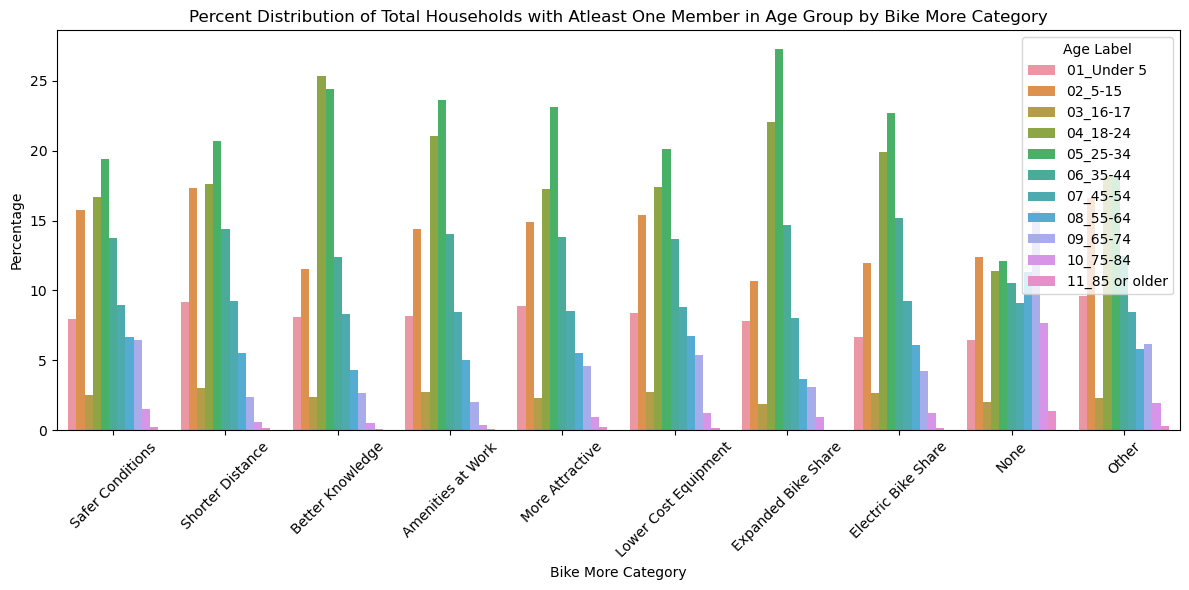

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so that 'bike_more_category' and 'bike_more_description' become columns again for easy plotting
#plot_data = percentage_distribution.reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=percentage_distribution_long, x='bike_more_description_short', y='percentage', hue='age_label', ci=None)

# Improve the layout
plt.title('Percent Distribution of Total Households with Atleast One Member in Age Group by Bike More Category')
plt.ylabel('Percentage')
plt.xlabel('Bike More Category')
plt.xticks(rotation=45)
plt.legend(title='Age Label')

# Show the plot
plt.tight_layout()
plt.show()


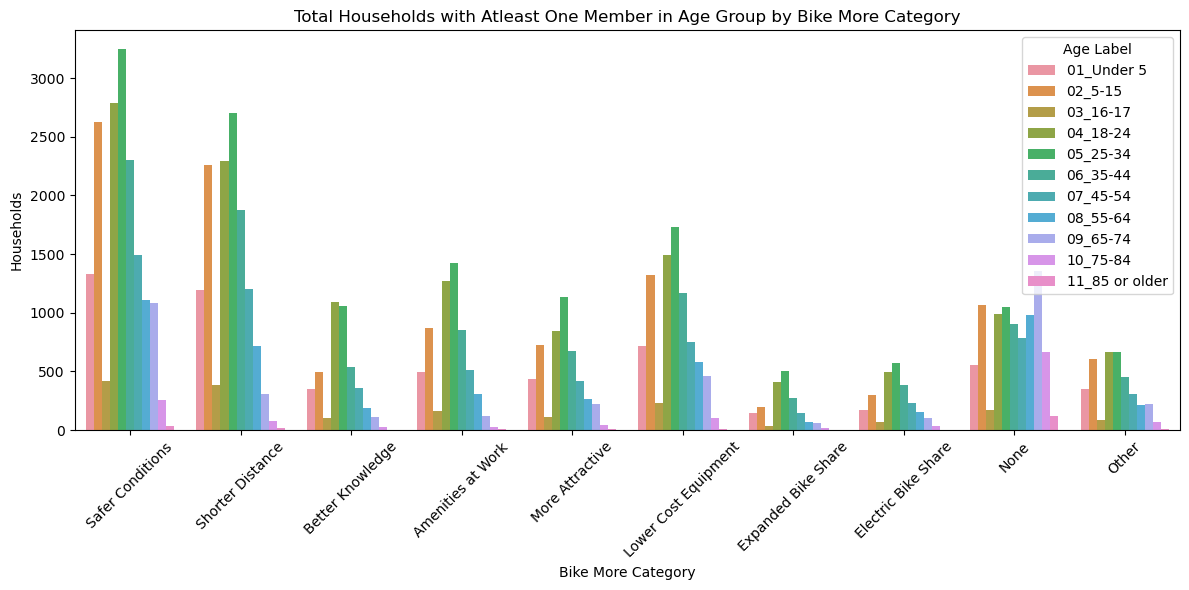

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so that 'bike_more_category' and 'bike_more_description' become columns again for easy plotting
#plot_data = percentage_distribution.reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_bike_more_hh_by_age_with_descriptions, x='bike_more_description_short', y='total', hue='age_label', ci=None)

# Improve the layout
plt.title('Total Households with Atleast One Member in Age Group by Bike More Category')
plt.ylabel('Households')
plt.xlabel('Bike More Category')
plt.xticks(rotation=45)
plt.legend(title='Age Label')

# Show the plot
plt.tight_layout()
plt.show()